In [5]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('HR.csv') # загружаем файл в датафрейм

In [7]:
df # просматриваем датафрейм

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Расчет основных статистик для переменных 

In [9]:
df['satisfaction_level'].mean().round(2), \
df['satisfaction_level'].median(), \
df['satisfaction_level'].mode()[0], \
df['satisfaction_level'].min(), \
df['satisfaction_level'].max(), \
round(df['satisfaction_level'].var(), 2)

(0.61, 0.64, 0.1, 0.09, 1.0, 0.06)

In [10]:
df['last_evaluation'].mean().round(2), \
df['last_evaluation'].median(), \
df['last_evaluation'].mode()[0], \
df['last_evaluation'].min(), \
df['last_evaluation'].max(), \
round(df['last_evaluation'].var(), 2)

(0.72, 0.72, 0.55, 0.36, 1.0, 0.03)

In [11]:
df['number_project'].mean().round(2), \
df['number_project'].median(), \
df['number_project'].mode()[0], \
df['number_project'].min(), \
df['number_project'].max(), \
round(df['number_project'].var(), 2)

(3.8, 4.0, 4, 2, 7, 1.52)

In [12]:
df['average_montly_hours'].mean().round(2), \
df['average_montly_hours'].median(), \
df['average_montly_hours'].mode()[0], \
df['average_montly_hours'].min(), \
df['average_montly_hours'].max(), \
round(df['average_montly_hours'].var(), 2)

(201.05, 200.0, 135, 96, 310, 2494.31)

In [13]:
df['time_spend_company'].mean().round(2), \
df['time_spend_company'].median(), \
df['time_spend_company'].mode()[0], \
df['time_spend_company'].min(), \
df['time_spend_company'].max(), \
round(df['time_spend_company'].var(), 2)

(3.5, 3.0, 3, 2, 10, 2.13)

## Расчет и визуализация корреляционной матрицы для количественных переменных

In [14]:
df[['satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

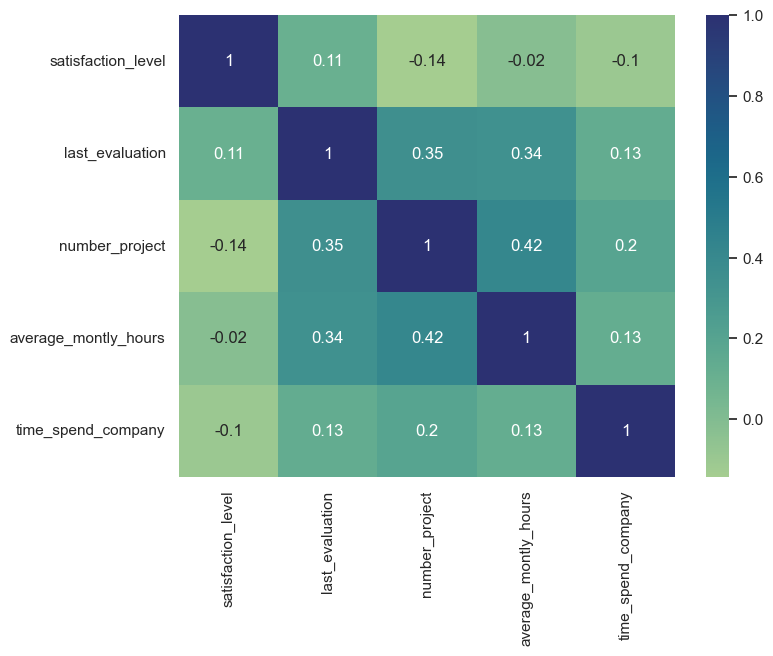

In [15]:
sns.set(rc = {'figure.figsize' : (8, 6)})
sns.heatmap(df[['satisfaction_level', 
                'last_evaluation', 
                'number_project', 
                'average_montly_hours', 
                'time_spend_company']].corr(), annot=True, cmap='crest')

Самые скоррелированные - количество проектов и среднее количество часов на рабочем месте
Наименее скоррелированные - количество времени, проведенное в компании и уровень удовлетворенности

## Считаем сколько сотрудников работает в каждом департаменте

In [8]:
_ = df.groupby('department').count()
counted = _['left']
counted

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

## Распределение сотрудников по зарплатам

In [40]:
_ = df.groupby('salary').count()
counted = _['left']
counted

salary
high      1237
low       7316
medium    6446
Name: left, dtype: int64

## Распределение сотрудников по зарплатам в каждом департаменте

In [41]:
_ = df.groupby(['department', 'salary']).count()
counted = _['left']
counted

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: left, dtype: int64

## Проверка гипотезы о зависимости проведенного на работе времени от оклада

In [17]:
df.groupby('salary')['average_montly_hours'].mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

Гипотеза не подтверждается. количество проведенного на работе времени не зависит от оклада

## Расчет показателей среди уволившихся и не уволившихся сотрудников

Уволившиеся

In [24]:
df_left = df.loc[df['left'] == 1]
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
df_left.groupby('promotion_last_5years').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,department,salary
promotion_last_5years,,,,,,,,,
0,3552,3552,3552,3552,3552,3552,3552,3552,3552
1,19,19,19,19,19,19,19,19,19


In [29]:
3552 + 19

3571

In [30]:
19 / 3571

0.005320638476617194

Из уволившихся сотрудников повышение получали только 0.5 процента

In [32]:
df_left['satisfaction_level'].mean()

0.4400980117614114

In [33]:
df_left['number_project'].mean()

3.8555026603192384

Работающие

In [34]:
df_working = df.loc[df['left'] == 0]

In [35]:
df_working.groupby('promotion_last_5years').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,department,salary
promotion_last_5years,,,,,,,,,
0,11128,11128,11128,11128,11128,11128,11128,11128,11128
1,300,300,300,300,300,300,300,300,300


In [36]:
11128 + 300

11428

In [37]:
300 / 11428

0.026251312565628283

In [ ]:
из работающих сотрудников повышение получали 2.6 процента (в пять раз больше, чем из уволившихся)

In [38]:
df_working['satisfaction_level'].mean()

0.666809590479524

In [39]:
df_working['number_project'].mean()

3.786664333216661